In [237]:
import numpy as np
import pandas as pd
import itertools as iterat
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,summarize)
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Problem 1

In [244]:
np.random.seed(1)
x0 = np.random.normal(1, 0, 200)
x1 = np.random.normal(0, 5, 200)
x2 = np.random.normal(0, 5, 200)
x3 = np.random.normal(0, 5, 200)
x4 = np.random.normal(0, 5, 200)
x5 = np.random.normal(0, 5, 200)
x6 = np.random.normal(0, 5, 200)
x7 = np.random.normal(0, 5, 200)
x8 = np.random.normal(0, 5, 200)
x9 = np.random.normal(0, 5, 200)
x10 = np.random.normal(0, 5, 200)
e = np.random.normal(0, 1, 200)
xs = np.matrix([x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,e]).T
coefs = np.matrix([0, 1, 1, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0, 1])
y = np.dot(xs, coefs.T)
xs = np.matrix([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]).T
column_values = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']
x_train = pd.DataFrame(data = xs[:100,:], columns = column_values)
x_test = pd.DataFrame(data = xs[100:,:], columns = column_values)
y_train = pd.DataFrame(data = y[:100,:], columns = ['y'])
y_test = pd.DataFrame(data = y[100:,:], columns = ['y'])

#### (a)

In [192]:
def fitSubset(features):
    x_cur = x_train[list(features)]
    complexity = x_cur.shape[1]
    x_cur['intercept']  = 1
    regres = sm.OLS(y_train, x_cur)
    results = regres.fit()
    bic = results.bic
    pred_train = results.predict(x_cur)
    y_train2 = y_train.y
    mse = (np.mean((y_train2 - pred_train)**2))
    return {"complexity":complexity, "model":results, "MSE":mse, "BIC":bic}

In [193]:
def modelK(k):    
    models = []
    for feats in iterat.combinations(x_train.columns, k):
        models.append(fitSubset(feats))
    result = pd.DataFrame(models)
    best_feat = result.loc[result["MSE"].argmin()]
    return best_feat

In [194]:
best_models = pd.DataFrame(columns=["complexity", "model", "MSE", "BIC"])
for i in range(1,11):
    best_models.loc[i-1] = modelK(i)
best_models['BIC'] = best_models['BIC'].astype(float)
best_model = best_models.loc[best_models["BIC"].argmin()]

In [195]:
final_model = best_model[1]
x_test2 = x_test[['x1', 'x2', 'x3', 'x4', 'x8']]
x_test2['intercept'] = 1
pred_test = final_model.predict(x_test2)
y_test2 = y_test.y
mse = (np.mean((y_test2 - pred_test)**2))
print(mse)
summarize(final_model)

1.2807623133629022


,coef,std err,t,P>|t|
x1,0.9728,0.021,46.266,0.000
x2,0.9844,0.021,47.620,0.000
x3,0.1279,0.022,5.689,0.000
x4,0.0646,0.023,2.864,0.005
x8,-0.0423,0.018,-2.316,0.023
intercept,0.0830,0.105,0.789,0.432


#### (b)

In [196]:
def fitSubset2(features):
    x_cur = x_train[list(features)]
    complexity = x_cur.shape[1]
    regres = sm.OLS(y_train, x_cur)
    results = regres.fit()
    bic = results.bic
    pred_train = results.predict(x_cur)
    y_train2 = y_train.y
    mse = (np.mean((y_train2 - pred_train)**2))
    return {"complexity":complexity, "model":results, "MSE":mse, "BIC":bic}

In [197]:
def modelForward(preds):    
    models = []
    left_preds = [pred for pred in x_train.columns if pred not in preds]
    for feat in left_preds:
        models.append(fitSubset2(preds+[feat]))
    result = pd.DataFrame(models)
    best_feat = result.loc[result["MSE"].argmin()]
    return best_feat

In [198]:
best_models2 = pd.DataFrame(columns=["complexity", "model", "MSE", "BIC"])
features = []
for i in range(1,11):
    best_models2.loc[i-1] = modelForward(features)
    features = best_models2.loc[i-1]["model"].model.exog_names
best_models2['BIC'] = best_models2['BIC'].astype(float)
best_model2 = best_models2.loc[best_models2["BIC"].argmin()]

In [199]:
x_trainF = x_train[['x2', 'x1', 'x3', 'x4', 'x8']]
x_trainF['intercept']  = 1
regres = sm.OLS(y_train, x_trainF)
final_model = regres.fit()
x_test3 = x_test[['x2', 'x1', 'x3', 'x4', 'x8']]
x_test3['intercept'] = 1
pred_test = final_model.predict(x_test3)
y_test3 = y_test.y
mse = (np.mean((y_test3 - pred_test)**2))
print(mse)
summarize(final_model)

1.2807623133629


,coef,std err,t,P>|t|
x2,0.9844,0.021,47.620,0.000
x1,0.9728,0.021,46.266,0.000
x3,0.1279,0.022,5.689,0.000
x4,0.0646,0.023,2.864,0.005
x8,-0.0423,0.018,-2.316,0.023
intercept,0.0830,0.105,0.789,0.432


#### (c)

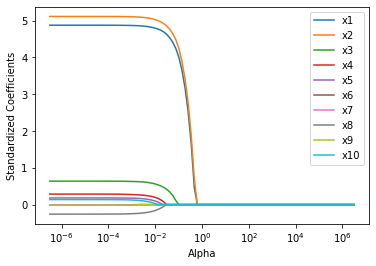

In [240]:
alphas = 20**np.linspace(5,-5,100)
coefs = pd.DataFrame(columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'alpha'])
x_train3 = x_train.copy()
x_scale = StandardScaler().fit(x_train3)
lasso = Lasso(normalize = True)
i = 0
for alpha in alphas:
    lasso.set_params(alpha = alpha)
    lasso.fit(x_scale.transform(x_train3), y_train)
    coefs.loc[i] = np.append(lasso.coef_, alpha)
    i += 1
ax = plt.gca()
ax.plot(alphas, coefs['x1'], label = 'x1')
ax.plot(alphas, coefs['x2'], label = 'x2')
ax.plot(alphas, coefs['x3'], label = 'x3')
ax.plot(alphas, coefs['x4'], label = 'x4')
ax.plot(alphas, coefs['x5'], label = 'x5')
ax.plot(alphas, coefs['x6'], label = 'x6')
ax.plot(alphas, coefs['x7'], label = 'x7')
ax.plot(alphas, coefs['x8'], label = 'x8')
ax.plot(alphas, coefs['x9'], label = 'x9')
ax.plot(alphas, coefs['x10'], label = 'x10')
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Standardized Coefficients')
plt.legend()
plt.show()

In [241]:
lassoCv = LassoCV(alphas = alphas, cv = 5, normalize = True)
lassoCv.fit(x_scale.transform(x_train3), y_train)
print(lassoCv.alpha_)
lassoF = Lasso(alpha = lassoCv.alpha_, normalize = True)
lassoResult = lassoF.fit(x_scale.transform(x_train3), y_train)
x_test4 = x_test.copy()
print(mean_squared_error(y_test, lassoResult.predict(x_scale.transform(x_test4))))
print(lassoResult.coef_)

0.00678604404148726
1.2853898315920083
[ 4.82008377  5.05323212  0.58718334  0.2247908   0.12688074 -0.
  0.         -0.19026895 -0.          0.06206416]


#### (d)

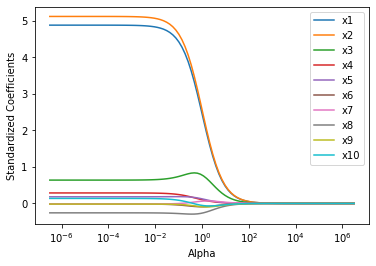

In [242]:
alphas = 20**np.linspace(5,-5,100)
coefs = pd.DataFrame(columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'alpha'])
x_train3 = x_train.copy()
x_scale = StandardScaler().fit(x_train3)
ridge = Ridge(normalize = True)
i = 0
for alpha in alphas:
    ridge.set_params(alpha = alpha)
    ridge.fit(x_scale.transform(x_train3), y_train)
    coefs.loc[i] = np.append(ridge.coef_, alpha)
    i += 1
ax = plt.gca()
ax.plot(alphas, coefs['x1'], label = 'x1')
ax.plot(alphas, coefs['x2'], label = 'x2')
ax.plot(alphas, coefs['x3'], label = 'x3')
ax.plot(alphas, coefs['x4'], label = 'x4')
ax.plot(alphas, coefs['x5'], label = 'x5')
ax.plot(alphas, coefs['x6'], label = 'x6')
ax.plot(alphas, coefs['x7'], label = 'x7')
ax.plot(alphas, coefs['x8'], label = 'x8')
ax.plot(alphas, coefs['x9'], label = 'x9')
ax.plot(alphas, coefs['x10'], label = 'x10')
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Standardized Coefficients')
plt.legend()
plt.show()

In [243]:
ridgeCv = RidgeCV(alphas = alphas, cv = 5, normalize = True)
ridgeCv.fit(x_scale.transform(x_train3), y_train)
print(ridgeCv.alpha_)
ridgeF = Ridge(alpha = ridgeCv.alpha_, normalize = True)
ridgeResult = ridgeF.fit(x_scale.transform(x_train3), y_train)
x_test4 = x_test.copy()
print(mean_squared_error(y_test, ridgeResult.predict(x_scale.transform(x_test4))))
print(ridgeResult.coef_)

0.012429424379672468
1.3978156677603755
[[ 4.81284894  5.04678619  0.65330934  0.28064697  0.18288956 -0.02006725
  -0.01474004 -0.2602384  -0.01891322  0.12987163]]


#### (e)

In [247]:
x_trainO = x_train.copy()
x_trainO['intercept']  = 1
regres = sm.OLS(y_train, x_trainO)
results = regres.fit()
x_testO = x_test.copy()
x_testO['intercept']  = 1
pred_test = results.predict(x_testO)
y_test2 = y_test.y
mse = (np.mean((y_test2 - pred_test)**2))
print(mse)
summarize(results)

1.3227538287385212


,coef,std err,t,P>|t|
x1,0.9700,0.021,45.822,0.000
x2,0.9872,0.021,47.678,0.000
x3,0.1328,0.023,5.742,0.000
x4,0.0621,0.024,2.639,0.010
x5,0.0344,0.020,1.694,0.094
x6,-0.0035,0.023,-0.154,0.878
x7,-0.0029,0.020,-0.150,0.881
x8,-0.0449,0.018,-2.430,0.017
x9,-0.0039,0.024,-0.164,0.870
x10,0.0294,0.023,1.273,0.206


### Problem 2

#### (a)

In [206]:
np.random.seed(1)
mean = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
cov = [[1, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 1, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 1, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 1, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 1, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 1, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1]]
x1, x2, x3, x4, x5, x6, x7, x8, x9, x10 = np.random.multivariate_normal(mean, cov, 200).T
e = np.random.normal(0, 0.001, 200)
y = x1 + e
xs = np.matrix([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]).T
column_values = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']
x_train = pd.DataFrame(data = xs[:100,:], columns = column_values)
x_test = pd.DataFrame(data = xs[100:,:], columns = column_values)
y_train = pd.DataFrame(data = y[:100, None], columns = ['y'])
y_test = pd.DataFrame(data = y[100:, None], columns = ['y'])

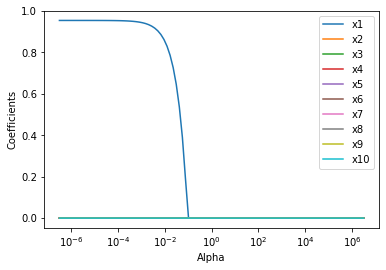

In [207]:
alphas = 20**np.linspace(5,-5,100)
coefs = pd.DataFrame(columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'alpha'])
lasso = Lasso(normalize = True)
i = 0
x_scale = StandardScaler().fit(x_train)
for alpha in alphas:
    lasso.set_params(alpha = alpha)
    lasso.fit(x_scale.transform(x_train), y_train)
    coefs.loc[i] = np.append(lasso.coef_, alpha)
    i += 1
ax = plt.gca()
ax.plot(alphas, coefs['x1'], label = 'x1')
ax.plot(alphas, coefs['x2'], label = 'x2')
ax.plot(alphas, coefs['x3'], label = 'x3')
ax.plot(alphas, coefs['x4'], label = 'x4')
ax.plot(alphas, coefs['x5'], label = 'x5')
ax.plot(alphas, coefs['x6'], label = 'x6')
ax.plot(alphas, coefs['x7'], label = 'x7')
ax.plot(alphas, coefs['x8'], label = 'x8')
ax.plot(alphas, coefs['x9'], label = 'x9')
ax.plot(alphas, coefs['x10'], label = 'x10')
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.legend()
plt.show()

In [208]:
lassoCv = LassoCV(alphas = alphas, cv = 5, normalize = True)
lassoCv.fit(x_scale.transform(x_train), y_train)
print(lassoCv.alpha_)
lasso_alpha = lassoCv.alpha_
lassoF = Lasso(alpha = lassoCv.alpha_, normalize = True)
lassoResult = lassoF.fit(x_scale.transform(x_train), y_train)
print(mean_squared_error(y_test, lassoResult.predict(x_scale.transform(x_test))))
print(lassoResult.coef_)

4.759973810119685e-06
9.10162893641468e-07
[9.53809152e-01 9.49586711e-05 0.00000000e+00 0.00000000e+00
 2.01649336e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


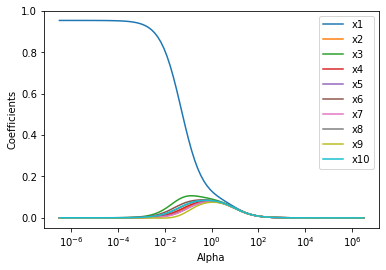

In [209]:
alphas = 20**np.linspace(5,-5,100)
coefs = pd.DataFrame(columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'alpha'])
x_scale = StandardScaler().fit(x_train)
ridge = Ridge(normalize = True)
i = 0
for alpha in alphas:
    ridge.set_params(alpha = alpha)
    ridge.fit(x_scale.transform(x_train), y_train)
    coefs.loc[i] = np.append(ridge.coef_, alpha)
    i += 1
ax = plt.gca()
ax.plot(alphas, coefs['x1'], label = 'x1')
ax.plot(alphas, coefs['x2'], label = 'x2')
ax.plot(alphas, coefs['x3'], label = 'x3')
ax.plot(alphas, coefs['x4'], label = 'x4')
ax.plot(alphas, coefs['x5'], label = 'x5')
ax.plot(alphas, coefs['x6'], label = 'x6')
ax.plot(alphas, coefs['x7'], label = 'x7')
ax.plot(alphas, coefs['x8'], label = 'x8')
ax.plot(alphas, coefs['x9'], label = 'x9')
ax.plot(alphas, coefs['x10'], label = 'x10')
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.legend()
plt.show()

In [210]:
ridgeCv = RidgeCV(alphas = alphas, cv = 5, normalize = True)
ridgeCv.fit(x_scale.transform(x_train), y_train)
print(ridgeCv.alpha_)
ridge_alpha = ridgeCv.alpha_
ridgeF = Ridge(alpha = ridgeCv.alpha_, normalize = True)
ridgeResult = ridgeF.fit(x_scale.transform(x_train), y_train)
print(mean_squared_error(y_test, ridgeResult.predict(x_scale.transform(x_test))))
print(ridgeResult.coef_)

3.125e-07
9.818875978151139e-07
[[ 9.53254271e-01  1.91588995e-04  2.26586734e-05 -4.29629741e-04
   3.97461957e-04  1.86684870e-04  3.76813123e-05 -1.89356948e-04
   1.15566164e-04  3.65750658e-04]]


#### (b)

In [211]:
np.random.seed(1)
mean = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
cov = [[1, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 1, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 1, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 1, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 1, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 1, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1]]
lassoCoefs = pd.DataFrame(columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
ridgeCoefs = pd.DataFrame(columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
for i in range(50):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10 = np.random.multivariate_normal(mean, cov, 100).T
    e = np.random.normal(0, 0.001, 100)
    y = x1 + e
    xs = np.matrix([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]).T
    column_values = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']
    x = pd.DataFrame(data = xs[:,:], columns = column_values)
    y = pd.DataFrame(data = y[:, None], columns = ['y'])
    x_scale = StandardScaler().fit(x)

    lassoF = Lasso(alpha = lasso_alpha, normalize = True)
    lassoResult = lassoF.fit(x_scale.transform(x), y)
    lassoCoefs.loc[i] = lassoResult.coef_
    
    ridgeF = Ridge(alpha = ridge_alpha, normalize = True)
    ridgeResult = ridgeF.fit(x_scale.transform(x), y)
    ridgeCoefs.loc[i] = ridgeResult.coef_.flatten()
print(np.var(lassoCoefs))
print(np.var(ridgeCoefs))

x1     5.469406e-03
x2     7.493488e-10
x3     4.336840e-10
x4     2.715181e-10
x5     2.641625e-10
x6     5.595887e-10
x7     1.331734e-10
x8     1.762104e-10
x9     8.103498e-11
x10    7.023902e-11
dtype: float64
x1     5.475647e-03
x2     1.618113e-07
x3     1.514894e-07
x4     1.179264e-07
x5     2.368494e-07
x6     2.370820e-07
x7     2.155199e-07
x8     1.846091e-07
x9     1.959632e-07
x10    2.216109e-07
dtype: float64


#### (c)

In [212]:
np.random.seed(1)
mean = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
cov = [[1, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 1, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 1, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 1, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 1, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 1, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1]]
x1, x2, x3, x4, x5, x6, x7, x8, x9, x10 = np.random.multivariate_normal(mean, cov, 200).T
e = np.random.normal(0, 0.001, 200)
y = x1 + e
xs = np.matrix([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]).T
column_values = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']
x_train = pd.DataFrame(data = xs[:100,:], columns = column_values)
x_test = pd.DataFrame(data = xs[100:,:], columns = column_values)
y_train = pd.DataFrame(data = y[:100, None], columns = ['y'])
y_test = pd.DataFrame(data = y[100:, None], columns = ['y'])

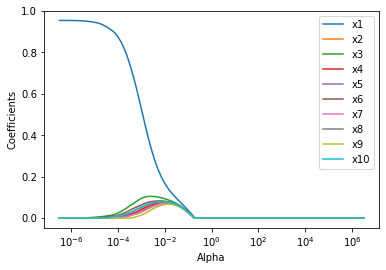

In [213]:
alphas = 20**np.linspace(5,-5,100)
coefs = pd.DataFrame(columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'alpha'])
elastic = ElasticNet(l1_ratio = 0.5, normalize = True)
x_scale = StandardScaler().fit(x_train)
i = 0
for alpha in alphas:
    elastic.set_params(alpha = alpha)
    elastic.fit(x_scale.transform(x_train), y_train)
    coefs.loc[i] = np.append(elastic.coef_, alpha)
    i += 1
ax = plt.gca()
ax.plot(alphas, coefs['x1'], label = 'x1')
ax.plot(alphas, coefs['x2'], label = 'x2')
ax.plot(alphas, coefs['x3'], label = 'x3')
ax.plot(alphas, coefs['x4'], label = 'x4')
ax.plot(alphas, coefs['x5'], label = 'x5')
ax.plot(alphas, coefs['x6'], label = 'x6')
ax.plot(alphas, coefs['x7'], label = 'x7')
ax.plot(alphas, coefs['x8'], label = 'x8')
ax.plot(alphas, coefs['x9'], label = 'x9')
ax.plot(alphas, coefs['x10'], label = 'x10')
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.legend()
plt.show()

In [214]:
elasticCv = ElasticNetCV(alphas = alphas, cv = 5, normalize = True)
elasticCv.fit(x_scale.transform(x_train), y_train)
print(elasticCv.alpha_)
elastic_alpha = elasticCv.alpha_
elasticF = ElasticNet(alpha = elasticCv.alpha_, normalize = True)
elasticResult = elasticF.fit(x_scale.transform(x_train), y_train)
print(mean_squared_error(y_test, elasticResult.predict(x_scale.transform(x_test))))
print(elasticResult.coef_)

3.125e-07
9.188912510223448e-07
[ 9.53826477e-01  1.25914057e-04 -3.37956832e-05 -2.90661135e-05
  8.08391070e-05 -1.76152716e-05 -1.40770796e-05 -3.41831753e-05
  4.33811550e-05  2.20407684e-05]


In [215]:
np.random.seed(1)
mean = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
cov = [[1, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 1, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 1, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 1, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 1, 0.95, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 1, 0.95, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1, 0.95, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1, 0.95, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1, 0.95],
      [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 1]]
elasticCoefs = pd.DataFrame(columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
for i in range(50):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10 = np.random.multivariate_normal(mean, cov, 100).T
    e = np.random.normal(0, 0.001, 100)
    y = x1 + e
    xs = np.matrix([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]).T
    column_values = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']
    x = pd.DataFrame(data = xs[:,:], columns = column_values)
    y = pd.DataFrame(data = y[:, None], columns = ['y'])
    x_scale = StandardScaler().fit(x)

    elasticF = ElasticNet(alpha = elastic_alpha, normalize = True)
    elasticResult = elasticF.fit(x_scale.transform(x), y)
    elasticCoefs.loc[i] = elasticResult.coef_
print(np.var(elasticCoefs))

x1     5.469195e-03
x2     2.068142e-09
x3     4.512040e-09
x4     2.208701e-09
x5     3.110290e-09
x6     1.838509e-08
x7     4.167341e-09
x8     2.498644e-09
x9     3.267827e-09
x10    3.225410e-09
dtype: float64


### Problem 3

In [231]:
farm = pd.read_csv('/Users/zach/Jupyter/DATA 558/framingham.csv')
farm = farm[(farm['chol0'] != -9) & (farm['chol2'] != -9) & (farm['chol4'] != -9) & (farm['chol6'] != -9) & (farm['chol8'] != -9) & (farm['chol10'] != -9)]
x = farm[['age', 'sex', 'BMI0', 'BMI10', 'cigarettes', 'chol0', 'chol2', 'chol4', 'chol6', 'chol8', 'chol10']]
y = farm[['death']]

#### (a)

In [232]:
def lasso(x, y, covars):
    x_scale = StandardScaler().fit(x)
    lassoCv = LogisticRegressionCV(cv = 5, penalty='l1', solver = 'saga', scoring = 'accuracy')
    lassoCv.fit(x_scale.transform(x), y)
    print(lassoCv.score(x_scale.transform(x),y))
    return lassoCv.coef_

In [233]:
lasso(x, y, x.columns)

0.8054429646786335


array([[ 0.85235307, -0.15817712,  0.        ,  0.        ,  0.24553962,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

#### (b)

In [234]:
def ridge(x, y, covars):
    x_scale = StandardScaler().fit(x)
    ridgeCv = LogisticRegressionCV(cv = 5, penalty='l2', solver = 'saga', scoring = 'accuracy')
    ridgeCv.fit(x_scale.transform(x), y)
    print(ridgeCv.score(x_scale.transform(x),y))
    return ridgeCv.coef_

In [235]:
ridge(x, y, x.columns)

0.8071800810654314


array([[ 0.98572068, -0.23940039,  0.16952798, -0.17660438,  0.34068501,
         0.1122008 ,  0.01295523, -0.09598053, -0.20990452, -0.08147377,
         0.24217136]])

#### (c)

In [236]:
x = sm.add_constant(x)
x_scale = StandardScaler().fit(x)
glm = sm.GLM(y, x_scale.transform(x), family=sm.families.Binomial()) 
results = glm.fit()
print(summarize(results))

         coef  std err       z  P>|z|
const  0.0000    0.000     NaN    NaN
x1     0.6655    0.058  11.389  0.000
x2    -0.1483    0.057  -2.616  0.009
x3     0.0738    0.098   0.752  0.452
x4    -0.0986    0.096  -1.023  0.306
x5     0.2155    0.057   3.767  0.000
x6     0.0785    0.086   0.916  0.360
x7     0.0027    0.092   0.030  0.976
x8    -0.0675    0.095  -0.711  0.477
x9    -0.1566    0.101  -1.558  0.119
x10   -0.0397    0.104  -0.382  0.703
x11    0.1247    0.100   1.243  0.214
